Deep Learning and Neural Networks - Assignment 0 - Task 1

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import turicreate

#generate points on a sinus curve
def f(X):
    return .5 + .4*np.sin(2*X*np.pi)

#generate a set of points around a sinus curve with mean 0 and Gaussian noise 0.05
def create_set(set_x):
    return f(set_x) + np.random.normal(0, 0.05, n)

1. Plot the target function (green line) and the training set n=10 (blue dots)

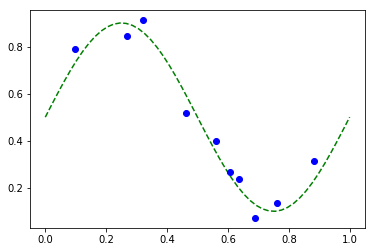

In [83]:
n=10
x = np.linspace(0,1)
train_x = np.random.uniform(0,1, n)
train_y = create_set(train_x)
plt.plot(x, f(x), 'g--', train_x, train_y, 'bo')

test_x = np.random.uniform(0,1, n)
test_y = create_set(test_x)

2. Plot target function (green line) training set n=10 (blue dots) and approximation function (red line) using 0,1,3,and 9 polynomials

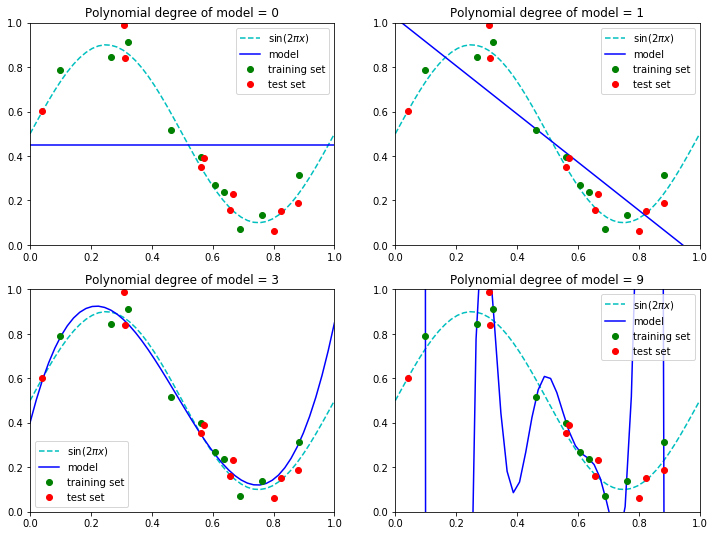

In [84]:
test_x = np.random.uniform(0,1, n)
test_y = create_set(test_x)

fig, axs = plt.subplots(2, 2, sharex='row', sharey='col', figsize=(12,9))

degrees = [0,1,3,9]
i=0

for ax in axs.flatten():
    
    x_linspace = np.linspace(0,1)
    
    #fit the polynomial of degrees[i] to the training set
    p = np.polyfit(train_x, train_y, degrees[i])

    ax.set_title("Polynomial degree of model = %i" % degrees[i])
    ax.plot(x, f(x), 'c--', x, np.polyval(p, x), 'b-', train_x, train_y, 'go', test_x, test_y, 'ro')

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    ax.legend(('sin($2\\pi x$)', 'model', 'training set', 'test set'))
    
    i +=1
    
plt.show()
    

In [85]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [86]:
data = pd.DataFrame(list(zip(train_x, train_y)), columns =['X1', 'Y'])
data = turicreate.SFrame(data)
test_data = turicreate.SFrame(pd.DataFrame(list(zip(test_x, test_y)), columns =['X1', 'Y']))
# data.head()

In [87]:
def plot_poly_predictions(data, model):
    
    plt.xlabel('x')
    plt.ylabel('y')

    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = turicreate.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'b-', label='degree ' + str(deg) + ' fit')
    plt.plot(data['X1'],data['Y'],'go')
    plt.plot(test_data['X1'],test_data['Y'],'ro')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

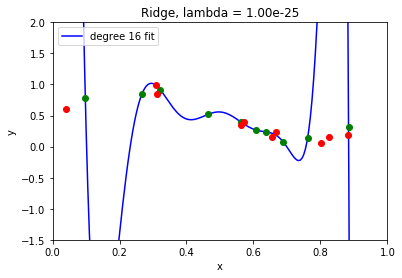

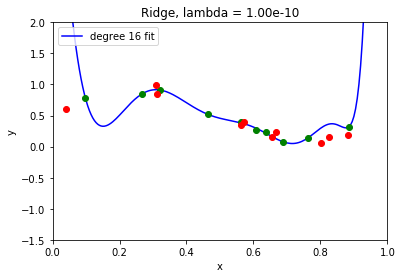

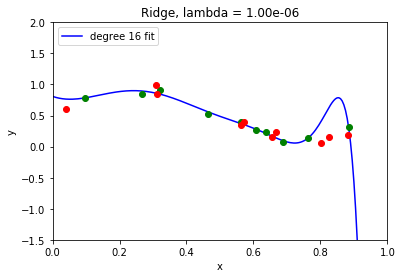

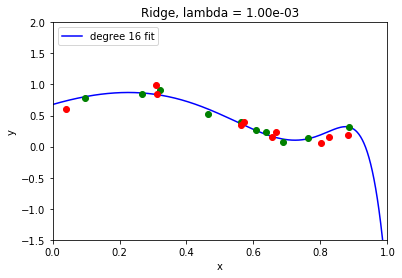

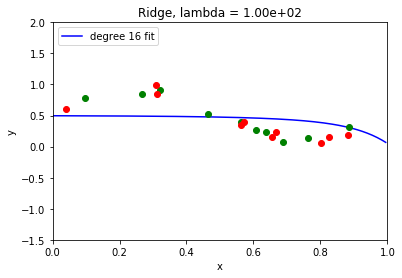

In [88]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)